In [1]:
import pandas as pd
df=pd.read_csv('/content/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [2]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [3]:
# splitting the data
x = df[['Delivery Time']]
y = df['Sorting Time']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16, 1)
(5, 1)
(16,)
(5,)


<Axes: >

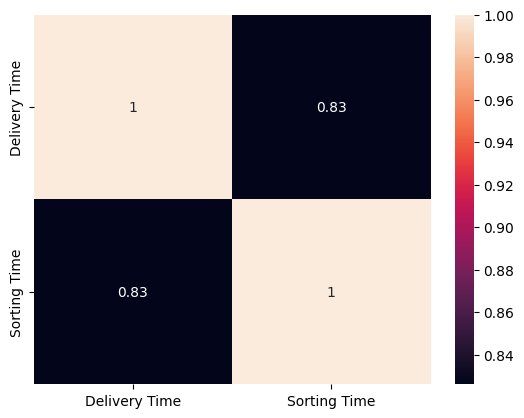

In [4]:
import numpy as np
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [5]:
# training the model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)


LinearRegression()

In [6]:
print(LR.intercept_)
print(LR.coef_)
LR.score(X_train,Y_train)

-0.24862256028023122
[0.39366418]


0.6268573432157138

In [7]:
ypred = LR.predict(X_test)
print(ypred)
# evaluating the performance of the model
import numpy as np # for rmse calculation
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(Y_test,ypred)
rmse = np.sqrt(mean_squared_error(Y_test,ypred))
print('r-squared: ',r2)
print('rmse: ',rmse)

[6.88063567 7.52624492 5.79412255 2.90069085 4.48715748]
r-squared:  0.7122905148662177
rmse:  1.0400902192132282


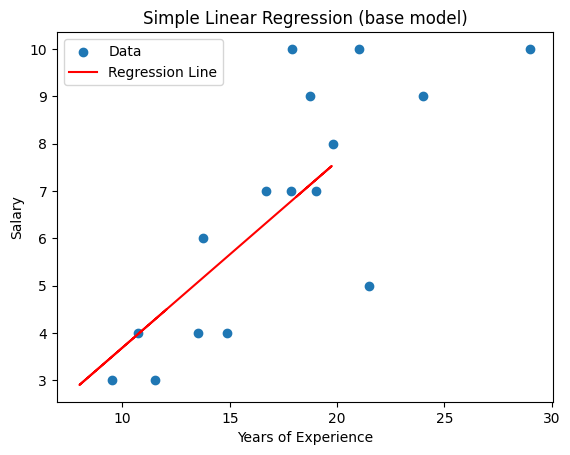

In [8]:
# Visualizing the base model predictions
import matplotlib.pyplot as plt
plt.scatter(X_train,Y_train, label='Data')
plt.plot(X_test, ypred, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Simple Linear Regression (base model)')
plt.show()

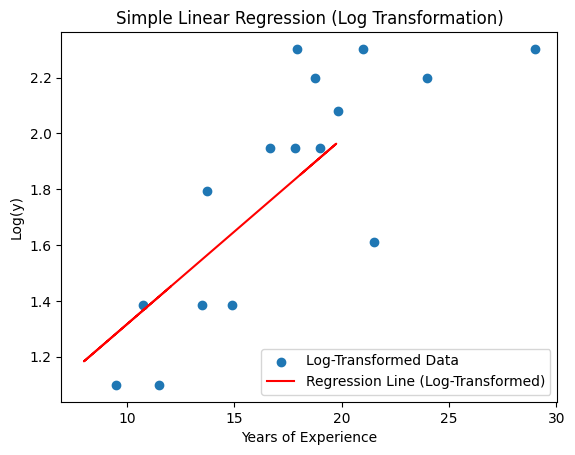

In [9]:
# Log transformation
y_log = np.log(Y_train) # transforming the dependent variable
LR_log = LinearRegression()
LR_log.fit(X_train, y_log)
y_log_pred = LR_log.predict(X_test)
plt.scatter(X_train, y_log, label='Log-Transformed Data')
plt.plot(X_test, y_log_pred, color='red', label='Regression Line (Log-Transformed)')
plt.xlabel('Years of Experience')
plt.ylabel('Log(y)')
plt.legend()
plt.title('Simple Linear Regression (Log Transformation)')
plt.show()

In [10]:
# evaluating the performance of the model
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_log_error
r2 = r2_score(Y_test,y_log_pred)
rmse = np.sqrt(mean_squared_error(Y_test,y_log_pred))
msle = mean_squared_log_error(Y_test,y_log_pred)
print('r-squared: ',r2)
print('rmse: ',rmse)
print('mean squared log error: ', msle)

r-squared:  -2.43541495096733
rmse:  3.59404510484178
mean squared log error:  0.6141510134526219


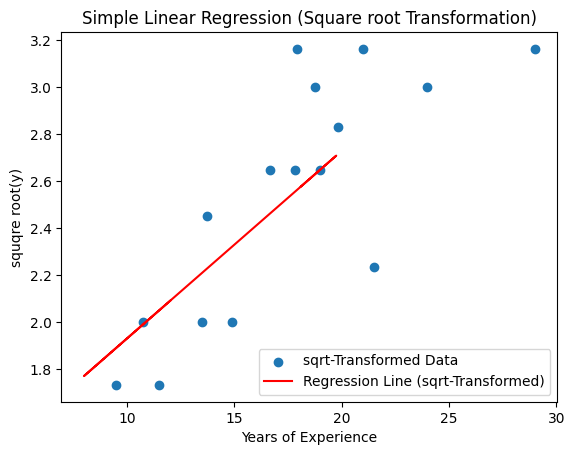

In [11]:
# Square root transformation
y_sqrt = np.sqrt(Y_train)
LR_sqrt = LinearRegression()
LR_sqrt.fit(X_train, y_sqrt)
y_sqrt_pred = LR_sqrt.predict(X_test)
plt.scatter(X_train, y_sqrt, label='sqrt-Transformed Data')
plt.plot(X_test, y_sqrt_pred, color='red', label='Regression Line (sqrt-Transformed)')
plt.xlabel('Years of Experience')
plt.ylabel('squqre root(y)')
plt.legend()
plt.title('Simple Linear Regression (Square root Transformation)')
plt.show()

In [12]:
# evaluating the performance of the model
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_log_error
r2 = r2_score(Y_test,y_sqrt_pred)
rmse = np.sqrt(mean_squared_error(Y_test,y_sqrt_pred))
msle = mean_squared_log_error(Y_test,y_sqrt_pred)
print('r-squared: ',r2)
print('rmse: ',rmse)
print('mean squared log error: ', msle)

r-squared:  -1.3698629966576714
rmse:  2.985077028726871
mean squared log error:  0.3329249898310246


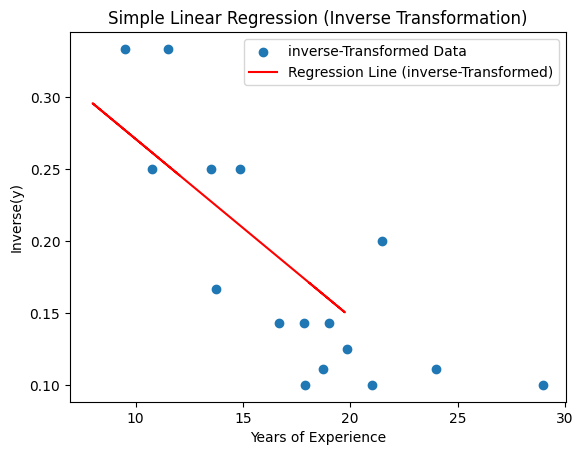

In [13]:
#Inverse transformation
y_inverse = 1/Y_train # transforming the dependent variable
LR_inverse = LinearRegression()
LR_inverse.fit(X_train, y_inverse)
y_inverse_pred = LR_inverse.predict(X_test)
plt.scatter(X_train, y_inverse, label='inverse-Transformed Data')
plt.plot(X_test, y_inverse_pred, color='red', label='Regression Line (inverse-Transformed)')
plt.xlabel('Years of Experience')
plt.ylabel('Inverse(y)')
plt.legend()
plt.title('Simple Linear Regression (Inverse Transformation)')
plt.show()

In [14]:
# evaluating the performance of the model
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_log_error
r2 = r2_score(Y_test,y_inverse_pred)
rmse = np.sqrt(mean_squared_error(Y_test,y_inverse_pred))
msle = mean_squared_log_error(Y_test,y_inverse_pred)
print('r-squared: ',r2)
print('rmse: ',rmse)
print('mean squared log error: ', msle)

r-squared:  -5.645362596240239
rmse:  4.998656155594551
mean squared log error:  2.423301337517296


In [15]:
Y_test

17    7
2     6
5     6
18    2
14    3
Name: Sorting Time, dtype: int64

In [16]:
y_inverse_pred

array([0.17067272, 0.15041132, 0.20477118, 0.29557687, 0.24578817])